In [196]:
import numpy as np
import matplotlib
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [197]:
# read in the train data set and take a peak at the data set
train_df = pd.read_csv("titanic_data/train.csv")
test_df = pd.read_csv('titanic_data/test.csv')
combine = [train_df,test_df]

# shape
print(f'Data shape{train_df.shape}\n')
print(f'Columns in the data set includes {train_df.columns.values}\n')
train_df.head()

Data shape(891, 12)

Columns in the data set includes ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
# look at the data type of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [199]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [200]:
# descriptions of columns whose data is not object type: int or float
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [201]:
# distribution of categorical data
train_df.describe(include=['O'])
# we encode sex and embarked since there are only 2 and 3 unique values respectively

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",male,1601,B96 B98,S
freq,1,577,7,4,644


In [202]:
print(f'There are {train_df.Survived.count()} passengers on board in the training set. {train_df.Survived.sum()} of the \
passengers survived, which is {100*round(train_df.Survived.sum()/train_df.Survived.count(),3)}%')
# The data is relatively balanced between survived and not survived

There are 891 passengers on board in the training set. 342 of the passengers survived, which is 38.4%


In [203]:
# missing data
total_missing = train_df.isnull().sum().sort_values(ascending=False)
percent_missing = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing,percent_missing],axis=1,names=['Total missing','Percent missing'])
missing_data
# we will drop cabin feature, fill in age and embarked

,0,1
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


# Explore the relationship between columns

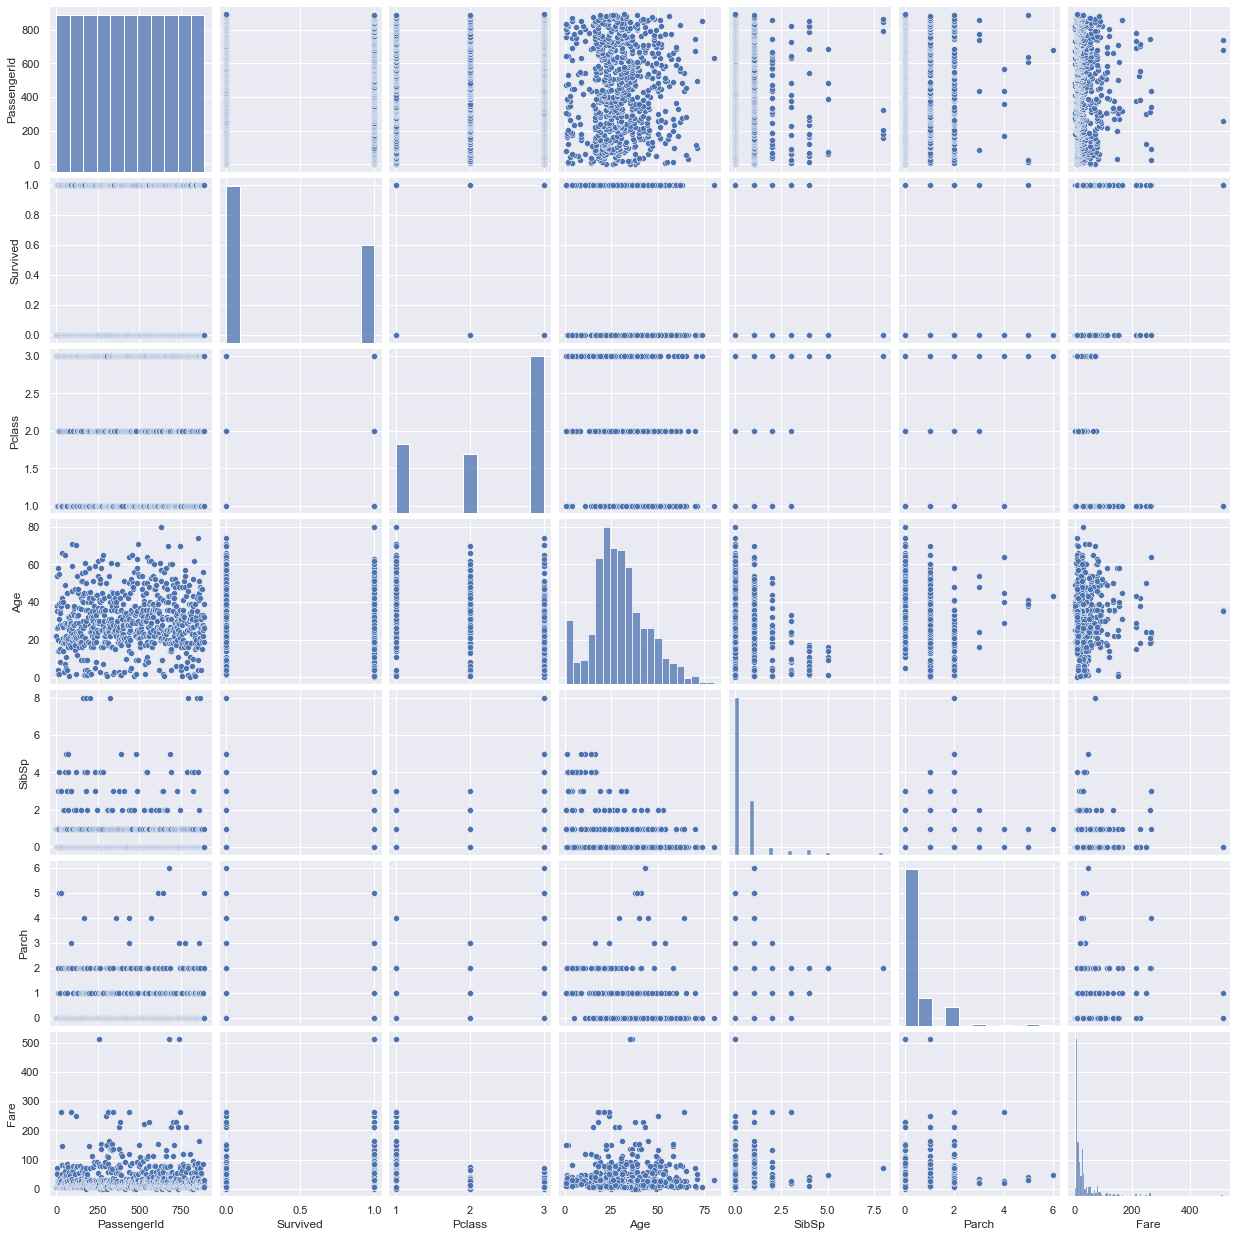

In [204]:
sns.set()
cols = ['PassengerId','Survived','Pclass','Age','SibSp', 'Parch','Fare']
sns.pairplot(train_df[cols])
plt.show()
# the scatter plot is not very helpful since the outcome Survived is binary, we should use pivot table
# or conditional multi-plot in grid

In [205]:
# create a pivot table to evaluate sex and survived rate
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


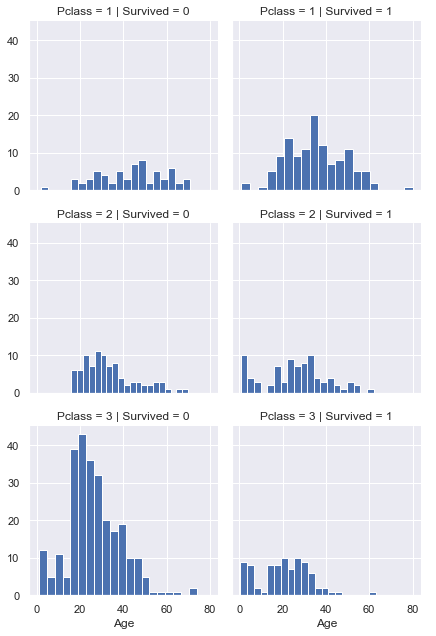

In [206]:
# create a grid of conditional multi-plot of age, pclass and survived
grid = sns.FacetGrid(train_df,row='Pclass',col='Survived')
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

/Users/carriesu/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/carriesu/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.

/Users/carriesu/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



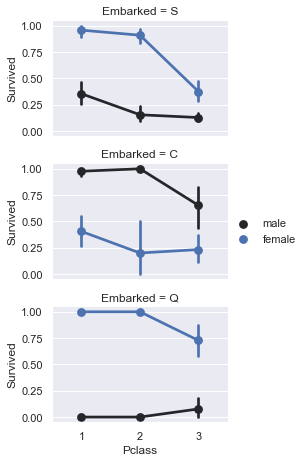

In [207]:
# create a grid of conditional multi-plot of embarked, survived and sex
grid = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex')
grid.add_legend()

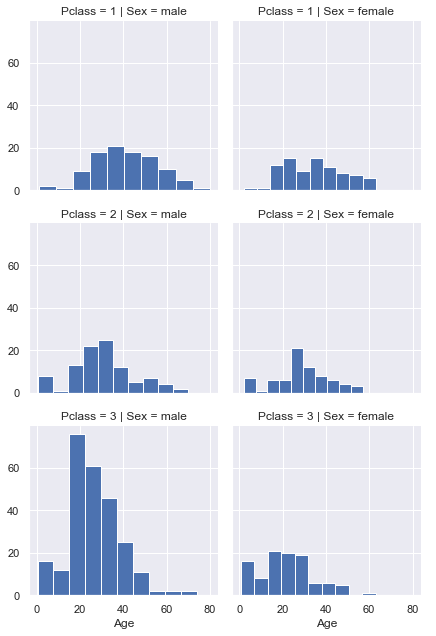

In [208]:
# create a grid of multi-plot of age, sex and pclass
grid = sns.FacetGrid(train_df,row='Pclass',col='Sex')
grid.map(plt.hist,'Age')
grid.add_legend()

# Wrangle, prepare and clean data

In [209]:
# drop cabin feature because there are too many missing data
# ticket feature may be dropped because of the high duplicate ratio and it might not have a correlation with survival
train_df.drop(columns=['Ticket','Cabin'],axis=1,inplace=True)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)

In [210]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [211]:
# # trial of encoding sex using one hot encoding
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# train_df['Sex Encoded'] = le.fit_transform(train_df.Sex)

# encoder = OneHotEncoder(categories = 'auto')
# X = encoder.fit_transform(
#     train_df['Sex Encoded'].values.reshape(-1,1)).toarray()
# dfonehot = pd.DataFrame(X).astype(int)
# # df = pd.concat([train_df['Sex'], dfonehot], axis =1)
# # df.columns = ['Sex','isFemale','isMale']
# dfonehot
# we do not use one hot encoding because it leads to increase of number of columns here
# train_df['Sex Encoded']


# train_df['Embarked Encoded']= le.fit_transform(train_df.Embarked)
# train_df['Embarked Encoded']
# X = encoder.fit_transform(
#     train_df['Embarked Encoded'].values.reshape(-1,1)).toarray()
# dfonehot = pd.DataFrame(X).astype(int)


In [212]:
# drop name and passenger id since it is not very relevant with survival
train_df = train_df.drop(columns=['Name','PassengerId'],axis=1)
test_df.drop(columns=['Name'],axis=1,inplace=True)

In [213]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [214]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [215]:
# fill in na for age and embarked
# there are only 2 rows that miss embarked data, so we use mode to fill in the empty position
freq_embarked = train_df.Embarked.dropna().mode()[0]
print(f'The most frequent embarked is {freq_embarked}')

for df in [train_df,test_df]:
    df['Embarked'] = df['Embarked'].fillna(freq_embarked)
    
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(['Survived'],ascending=False)

The most frequent embarked is S


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [216]:
# Convert categorical features including embarked and sex
for df in [train_df,test_df]:
    print(df.head())
    df['Sex'] = df['Sex'].map({'female':1,'male':0})
    df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})
# train_df.head()
test_df.head()

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [217]:
# we fill in the age by using the median of age with people in the same pclass and sex group
guess_ages = np.zeros((2,3))
for df in [train_df,test_df]:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = df[(df['Sex'] == i) & \
                                  (df['Pclass'] == j+1)]['Age'].dropna()


            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    df['Age'] = df['Age'].astype(int)
    

In [218]:
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

# Train model

In [219]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


In [220]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34,0,0,7.8292,2
1,893,3,1,47,1,0,7.0000,0
2,894,2,0,62,0,0,9.6875,2
3,895,3,0,27,0,0,8.6625,0
4,896,3,1,22,1,1,12.2875,0


In [221]:
test_df.isnull().values.any()
train_df.isnull().values.any()

False

In [222]:
Xtrain = train_df.drop(['Survived'],axis=1)
ytrain = train_df['Survived']
Xtest = test_df.drop(['PassengerId'],axis=1)

In [223]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,max_depth=5)
rf.fit(Xtrain,ytrain)
ypred = rf.predict(Xtest)

In [224]:
accu = round(rf.score(Xtrain,ytrain)*100,2)
print(f'The accuracy of our model is {accu}')

The accuracy of our model is 85.19


# Cross validation / Hyperparameter tunning

In [225]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [226]:
# use random search cross validation to narrow down the range of hyperparameters of a decision tree

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 105, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [227]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   34.0s


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

In [ ]:
# the model with best parameters is called 
best_random = rf_random.best_estimator_

In [ ]:
# Since random serch CV has narrowed down the range, we can use grid search 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(Xtrain, ytrain)
grid_search.best_params_

# Feature importance

In [ ]:
# construct a dataframe of feature importance
ipt_df = pd.DataFrame({'Feature':Xtrain.columns.values,
                      'Importance':rf.feature_importances_}).sort_values(['Importance'],ascending=True)

# or a Series for feature importance
# ipts = pd.Series(rf.feature_importances_,index=Xtrain.columns).sort_values()

In [ ]:
ipt_df

In [ ]:
plt.barh(ipt_df.Feature,ipt_df.Importance)
# ipts.plot(kind='barh')

In [ ]:
# We use permutation importance here to indicate the true predictive power of the model.
# permutation importance
from sklearn.inspection import permutation_importance
pipt = permutation_importance(rf,Xtrain,ytrain,random_state=0)

In [ ]:
pipt

In [ ]:
pipt_df = pd.DataFrame({'importance_mean':pipt.importances_mean,'importance_std':pipt.importances_std},
                       index=Xtrain.columns.values).sort_values('importance_mean',ascending=False)
pipt_df

In [ ]:
type(pipt_df.index)

In [ ]:
# visualize the results feature importances
xerr = pipt['importances_std']*1.96
ypos = np.arange(len(Xtrain.columns))
plt.barh(ypos,width=pipt_df.importance_mean,xerr=xerr)
plt.yticks(ypos,pipt_df.index)

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables (also called features). The figure above shows the permutation importances of features in the input data. In the bar plot,the length of the bar represents how much including a particular feature improves the predictionfor. The black thin line drawn on top of the bar shows the interval in which we are 95% confident that the feature importance lies. 

At the top of the list is sex, whether the passenger is a male or female This tells us the best predictor of the survival rate is the gender of the passenger, a rather interesting finding. The second most important factor is Pclass, also not that surprising. Siblings on board turns out to not be very helpful, along with embarked and parch. These importances all make sense as we would not expect parch to be a predictor of survival rate as it has nothing to do with getting on the life boat. Moreover, embarked only has three types for all data points and hence provides us with very little information for predicting the survival rate.

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = pipt_df['importance_mean'].values,
    x = pipt_df.index.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = pipt_df['importance_mean'].values,
        colorscale='Portland',
        showscale=True
    ),
    text =pipt_df.index.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [ ]:
# Use seaborn for the barplot for feature importance
sns.barplot(x=pipt_df['importance_mean'].values,y=pipt_df.index.values)

In [ ]:
# train_test_split
# Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split
# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = \
# train_test_split(features, labels, test_size = 0.25, random_state = 42)